In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [39]:
data = [
    [3,     1.5,    1],
    [2,     1,      0],
    [4,     1.5,    1],
    [3,     1,      0],
    [3.5,  .5,      1],
    [2,    .5,      0],
    [5.5,   1,     1],
    [1,      1,     0]
]
mystrey_flower = [4.1,1]

In [41]:
def sigmod(x):
    return 1/(1+np.exp(-x))
def sigmod_p(x):
    return sigmod(x)*(1-sigmod(x))


In [42]:
T = np.linspace(-5,5,10)
Y = sigmod(T)
Z = sigmod_p(T)

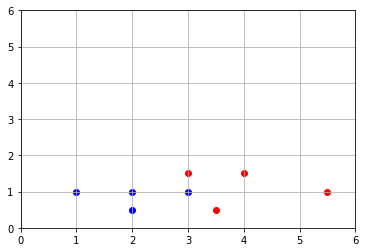

In [44]:
#scatter data
plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = "r"
    if point[2]==0:
        color = 'b'
    plt.scatter(point[0],point[1],c=color)

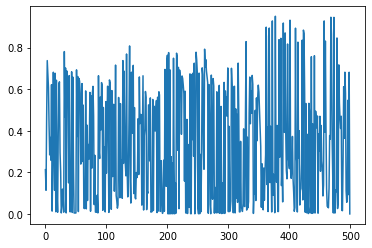

In [82]:

# network
#        o    flower type
#      /  \     w1,  w2,     b
#     o    o length  width   q1
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()


# training loop
 
learning_rate = 0.001
costs = [] 

for i in range(50000):
    ri = np.random.randint(len(data))  # random index from the data
   # point = data[ri]
    
                    # target value
    
    
   
    dcost_dpred = 2* (pred - target)     # dcost/dpred
    dpred_dz    =  sigmod_p(z)           # dpred/dz
    
    dz_dw1 = point[0]                    #dz/dw1
    dz_dw2 = point[2]                    #dz/dw2
    dz_db  = 1                           #dz/db
    
    dcost_dz =  dcost_dpred *  dpred_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db  = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1   # Gradient Descent
    w2 = w2 - learning_rate * dcost_dw2
    b =  b - learning_rate * dcost_db
    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[ri]
            z = point[0]*w1 + point[1]*w2 + b    #  hypothesis
            pred = sigmod(z) 
            
            target = point[2]  # pred value
          
            cost_sum += np.square(pred - target)   
        costs.append(cost_sum/len(data))
        
            
    
plt.plot(costs)
     